In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [4]:
# обнуляем ячейки с отсутствием данных
for i in data:
    data = data[ pd.isnull( data[i] ) == 0 ]
    

In [5]:
#check
print('Для v128 пустых строк {}'.format( len( data[ pd.isnull( data['v128'] ) ] ) ))

Для v128 пустых строк 0


In [6]:
data.target.unique()

array([1, 0])

In [7]:
y=data['target']

In [8]:
X = data
del X ['ID']
# столбец target является целевой переменной, удаляем его из X
del X ['target']
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
21,1.289841,4.788645,C,4.283417,10.719571,3.107570,1.962151,0.080812,8.604652,5.229758,...,5.968993,2.169826,0.004920,CD,1.460793,1.531375,1.964652,1,2.111675,1.346155
63,2.495783,9.306134,C,6.572474,10.292470,3.001686,2.664418,0.511063,10.235293,0.787746,...,8.705882,2.510637,0.757561,K,1.483949,4.584738,3.453224,0,1.645569,2.461539
64,2.567534,7.514002,C,3.363238,5.243808,2.032217,2.299877,1.621858,7.568438,0.525164,...,5.152980,4.721778,1.715600,K,1.943936,2.676581,0.632545,0,2.129310,2.267206
68,1.312574,9.353351,C,5.289176,10.368787,3.342530,2.782814,0.287117,8.544892,1.050329,...,7.182663,2.253375,0.432564,K,1.533032,2.601497,3.355834,0,0.815865,2.500000
73,1.095601,6.772009,C,5.431377,10.202250,1.844332,1.920473,7.403780,6.277372,1.050329,...,4.598540,2.942474,7.318691,AZ,1.139705,1.871827,3.147261,0,1.744493,1.414140


In [9]:
data.shape

(17756, 131)

In [10]:
from pandas.api.types import is_string_dtype

In [11]:
columns_strings=[]
for i in X:
    if is_string_dtype(X[i]):
        columns_strings.append(i)
        
columns_strings    

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [12]:
# столбцы columns_strings является категориальной переменной
# переведем ее в значения, добавив столбцы с соответствующими названиями
X = pd.get_dummies( X, columns = columns_strings )

In [13]:
X.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
21,1.289841,4.788645,4.283417,10.719571,3.107570,1.962151,0.080812,8.604652,5.229758,16.275460,...,0,0,0,0,0,0,0,0,0,0
63,2.495783,9.306134,6.572474,10.292470,3.001686,2.664418,0.511063,10.235293,0.787746,14.225232,...,0,0,0,0,0,0,0,0,0,0
64,2.567534,7.514002,3.363238,5.243808,2.032217,2.299877,1.621858,7.568438,0.525164,15.110132,...,0,0,0,0,0,0,0,0,0,0
68,1.312574,9.353351,5.289176,10.368787,3.342530,2.782814,0.287117,8.544892,1.050329,15.277561,...,0,0,0,0,0,0,0,0,0,0
73,1.095601,6.772009,5.431377,10.202250,1.844332,1.920473,7.403780,6.277372,1.050329,16.240929,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(17756, 7387)

In [15]:
# Поделим на train и тест
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train)   

bag_clf = BaggingClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(), n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=-1)

In [17]:
def show_auc(y, y_pred, plot_label='', prin=True):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

Train RF:
ROC AUC: 0.7315
Test RF:
ROC AUC: 0.6925
Train BAG:
ROC AUC: 0.9990
Test BAG:
ROC AUC: 0.6776


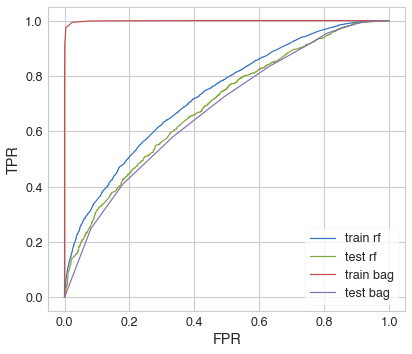

In [18]:
my_pred_test_rf = clf_rf.predict_proba(X_test)[:, 1]
my_pred_train_rf = clf_rf.predict_proba(X_train)[:, 1]
my_pred_test_bag = bag_clf.predict_proba(X_test)[:, 1]
my_pred_train_bag = bag_clf.predict_proba(X_train)[:, 1]

print('Train RF:')
show_auc(y_train, my_pred_train_rf, 'train rf')
print('Test RF:')
show_auc(y_test, my_pred_test_rf, 'test rf')
print('Train BAG:')
show_auc(y_train, my_pred_train_bag, 'train bag')
print('Test BAG:')
show_auc(y_test, my_pred_test_bag, 'test bag')

plt.legend();

In [19]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False)

43      0.437481
7209    0.082109
7210    0.072773
7116    0.054432
7208    0.049329
          ...   
4916    0.000000
4917    0.000000
4918    0.000000
4919    0.000000
3693    0.000000
Length: 7387, dtype: float64

In [20]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [21]:
classifier = StackingClassifier(
    [
        ('lr', LogisticRegression(max_iter=100000)),
        ('dt', DecisionTreeClassifier())
    ],
LogisticRegression())

In [22]:
data1 = pd.read_csv('train.csv')

In [23]:
# Уменьшим размер данных для ускорения обучения, возьмем случайную подвыборку 20% данных
from sklearn.model_selection import StratifiedShuffleSplit

random_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=777)

for train_index, test_index in random_splitter.split(data1, data1.target):
    data1 = data1.iloc[test_index]

In [24]:
# Разбиваем на train/test
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=777)

for train_index, test_index in splitter.split(data1, data1.target):
    d_train = data1.iloc[train_index]
    d_test = data1.iloc[test_index]
    
    y_train = data1['target'].iloc[train_index]
    y_test = data1['target'].iloc[test_index]

In [25]:
#Находим категориальные признаки
cat_feat = list(data1.dtypes[data1.dtypes == object].index)

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data1[cat_feat] = data1[cat_feat].fillna('nan')

#отфильтруем непрерывные признаки
num_feat = [f for f in data1 if f not in (cat_feat + ['ID', 'target'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = d_train[cat_feat].nunique()
print(cat_nunique)

#Чтобы в разы не увеличивать число признаков при построении dummy,
#будем использовать категориальные признаки с < 30 уникальных значений
cat_feat = list(cat_nunique[cat_nunique < 30].index)

v3         3
v22     6610
v24        5
v30        7
v31        3
v47        9
v52       12
v56       90
v66        3
v71        5
v74        3
v75        4
v79       17
v91        7
v107       7
v110       3
v112      22
v113      34
v125      88
dtype: int64


In [26]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(d_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(d_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]


# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([d_train[num_feat].fillna(-999),
                     dummy_train], axis=1)

X_test = pd.concat([d_test[num_feat].fillna(-999),
                     dummy_test], axis=1)

In [27]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=100000)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [28]:
classifier.named_estimators_['lr']

LogisticRegression(max_iter=100000)

In [29]:
y_pred_proba_lr = classifier.named_estimators_['lr'].predict_proba(X_test)[:,1]

In [30]:
y_pred_proba_dt = classifier.named_estimators_['dt'].predict_proba(X_test)[:,1]

In [31]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]

LR
ROC AUC: 0.7211
DT
ROC AUC: 0.5744
STACK
ROC AUC: 0.7225


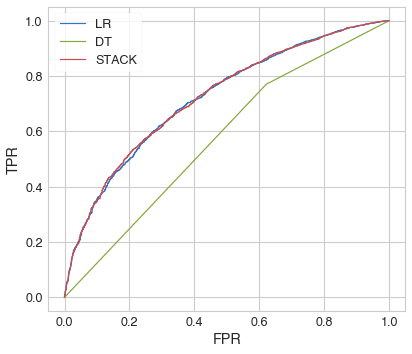

In [32]:
print("LR")
show_auc(y_test, y_pred_proba_lr, 'LR')
print("DT")
show_auc(y_test, y_pred_proba_dt, 'DT')
print("STACK")
show_auc(y_test, y_pred_proba, 'STACK')
plt.legend()
plt.show()

In [33]:
classifier.final_estimator_

LogisticRegression()

<AxesSubplot:>

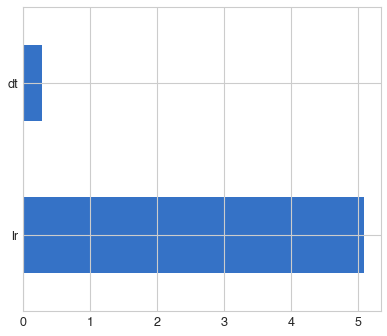

In [34]:
pd.Series(classifier.final_estimator_.coef_.flatten(), index=classifier.named_estimators_.keys()).plot(kind='barh')